In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
output_dir = 'D:/Thesis/files_output_dir/output_preprocessing/'
# Load the history workday files into DataFrames
level1_road_history_workday = pd.read_csv(output_dir + 'level1_road_history_workday.csv') 
level2_road_history_workday = pd.read_csv(output_dir + 'level2_road_history_workday.csv')
level3_road_history_workday = pd.read_csv(output_dir + 'level3_road_history_workday.csv')

In [26]:
# Load the history holiday files into DataFrames
level1_road_history_holiday = pd.read_csv(output_dir + 'level1_road_history_holiday.csv') 
level2_road_history_holiday = pd.read_csv(output_dir + 'level2_road_history_holiday.csv')
level3_road_history_holiday = pd.read_csv(output_dir + 'level3_road_history_holiday.csv')

In [22]:
def summary_stats(df):
    stats = df.describe()
    # Checking for missing values
    missing_values = df.isnull().sum()

    print('statistics summery:\n',stats)
    print('missing value summery:\n',missing_values)

In [17]:
def plot_histograme(df):
    selected_collumns = ['avg_speed', 'avg_speed std', 'no_taxi_car']

    plt.figure(figsize=(12, 8))
    for i, column in enumerate(selected_collumns, 1):
        # plt.subplot(3, 3, i)
        plt.hist(df[column], bins=30, edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [18]:
def show_correlation(df):
    numerical_columns = ['length', 'lanes', 'max_speed', 'n_connnections', 'sum_poi', 'time',
                         'avg_speed', 'avg_speed std', 'no_taxi_car']

    # Correlation matrix for numerical variables
    correlation_matrix = df[numerical_columns].corr()

    # Plotting the correlation matrix
    plt.figure(figsize=(10, 8))
    plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
    plt.xticks(range(len(numerical_columns)), numerical_columns, rotation=90)
    plt.yticks(range(len(numerical_columns)), numerical_columns)
    plt.colorbar()
    plt.title('Correlation Matrix of Numerical Features', pad=30)
    plt.show()

    print(correlation_matrix)

In [11]:
def distribution_time(df):
    # Analyzing the impact of 'time' on various variables and combining insights into one comprehensive analysis

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # 1. Average Speed by Road Level Across Different Time Periods
    for level in df['level'].unique():
        subset = df[df['level'] == level]
        avg_speed_by_time = subset.groupby('time')['avg_speed'].mean()
        axs[0, 0].plot(avg_speed_by_time.index, avg_speed_by_time.values, marker='o', label=f'Level {level}')
        axs[0, 0].set_title('Average Speed by Road Level Across Different Time Periods')
        axs[0, 0].set_xlabel('Time')
        axs[0, 0].set_ylabel('Average Speed')
        axs[0, 0].legend(title='Road Level')
        axs[0, 0].grid(True)

        # 2. Distribution of Average Speed Across Time
        df.groupby('time')['avg_speed'].mean().plot(ax=axs[0, 1], marker='o', color='blue')
        axs[0, 1].set_title('Distribution of Average Speed Across Time')
        axs[0, 1].set_xlabel('Time')
        axs[0, 1].set_ylabel('Average Speed')
        axs[0, 1].grid(True)

        # 3. Number of Taxis/Cars Across Time
        df.groupby('time')['no_taxi_car'].sum().plot(ax=axs[1, 0], marker='o', color='green')
        axs[1, 0].set_title('Number of Taxis/Cars Across Time')
        axs[1, 0].set_xlabel('Time')
        axs[1, 0].set_ylabel('Number of Taxis/Cars')
        axs[1, 0].grid(True)

        # 4. Average Speed Standard Deviation Across Time
        df.groupby('time')['avg_speed std'].mean().plot(ax=axs[1, 1], marker='o', color='red')
        axs[1, 1].set_title('Average Speed Standard Deviation Across Time')
        axs[1, 1].set_xlabel('Time')
        axs[1, 1].set_ylabel('Avg Speed Std Dev')
        axs[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

In [19]:
def peak_hour_usage(df):
    # Identifying peak hours for road usage based on the number of taxis/cars
    peak_hours = df.groupby('time')['no_taxi_car'].sum()

    # Finding the time periods with the highest number of taxis/cars
    peak_hours_sorted = peak_hours.sort_values(ascending=False).head(10)
    # print(peak_hours_sorted)
    # Plotting the results
    plt.figure(figsize=(10, 6))
    peak_hours_sorted.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Peak Hours for Road Usage')
    plt.xlabel('Time')
    plt.ylabel('Number of Taxis/Cars')
    plt.xticks(rotation=45)
    plt.show()

In [45]:
def combined_stats(history_workday,history_holiday):
    # Calculate summary statistics for workday and holiday data
    workday_stats = history_workday.describe()
    holiday_stats = history_holiday.describe()
    # Combine the statistics into a single DataFrame
    combined_stats = pd.concat([workday_stats[['avg_speed','no_taxi_car']], holiday_stats[['avg_speed','no_taxi_car']]], axis=1)
    combined_stats.columns = ['Workday_speed', 'Workday_taxi', 'Holiday_speed', 'Holiday_taxi']

    # Display the combined summary statistics
    print(combined_stats[['Workday_speed','Holiday_speed','Workday_taxi','Holiday_taxi']])

             road_id         length          lanes      max_speed  \
count  594990.000000  594990.000000  594990.000000  594990.000000   
mean    41800.279343     294.893843       3.021573      22.799860   
std     22797.401971     425.436291       0.835310       6.547046   
min       129.000000       5.737977       1.000000       2.777778   
25%     22197.000000      72.754605       3.000000      19.444444   
50%     39791.000000     163.958516       3.000000      19.444444   
75%     60705.000000     357.794648       4.000000      30.555556   
max     81557.000000    5554.701467       8.000000      30.555556   

                 dir          level            tor  n_connnections  \
count  594990.000000  594990.000000  594990.000000   594990.000000   
mean        0.000195       0.583780       1.035753        2.861137   
std         0.013962       0.492931       0.285634        1.030794   
min         0.000000       0.000000       1.000000        0.000000   
25%         0.000000       0

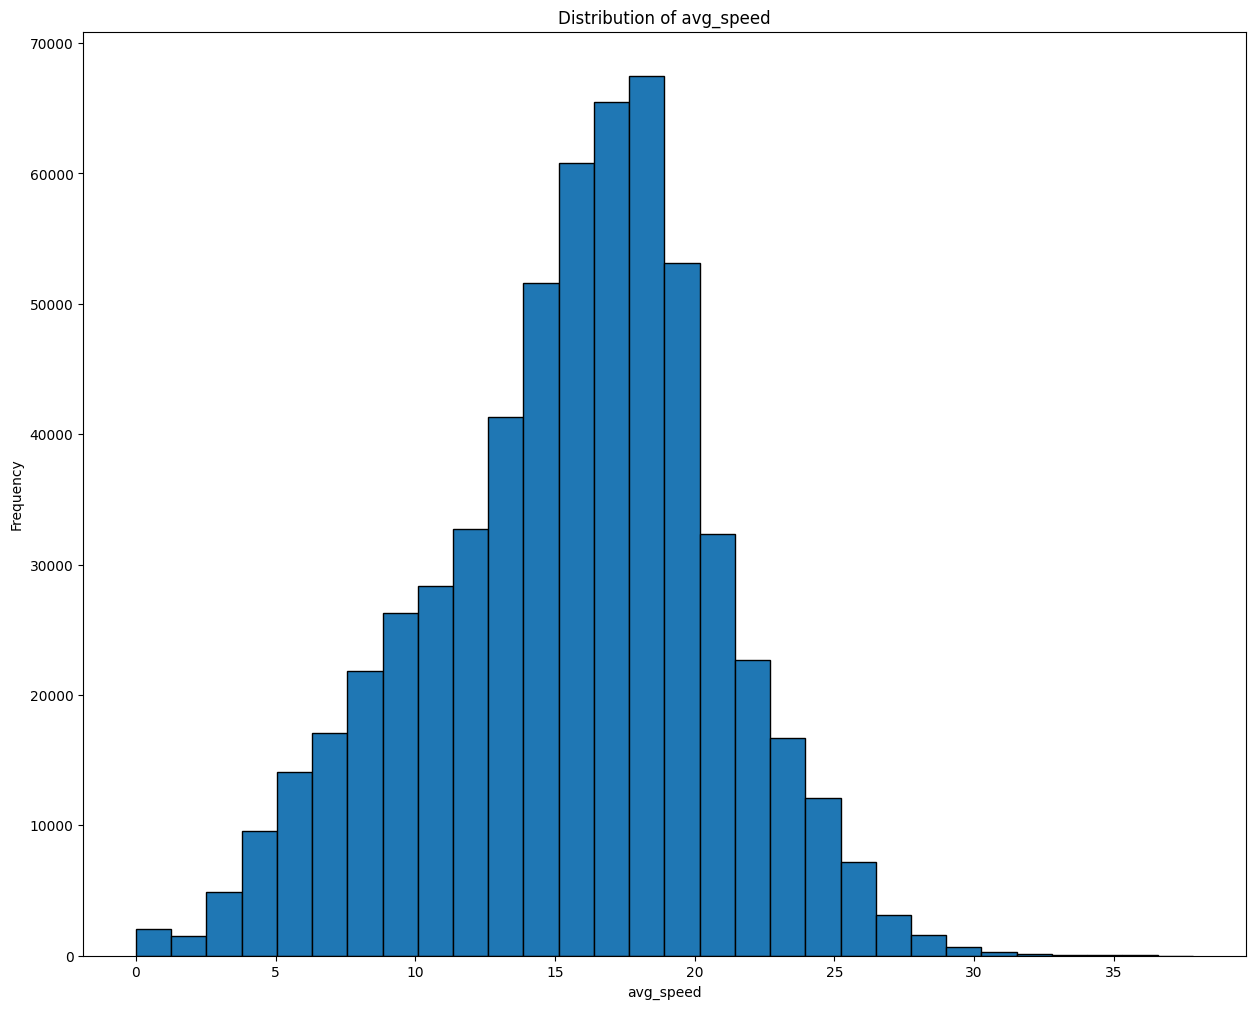

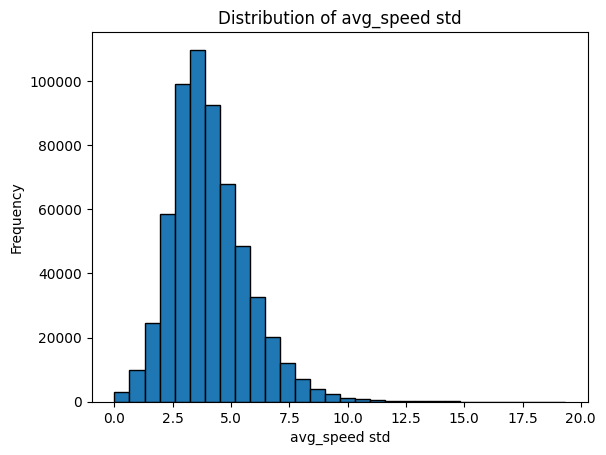

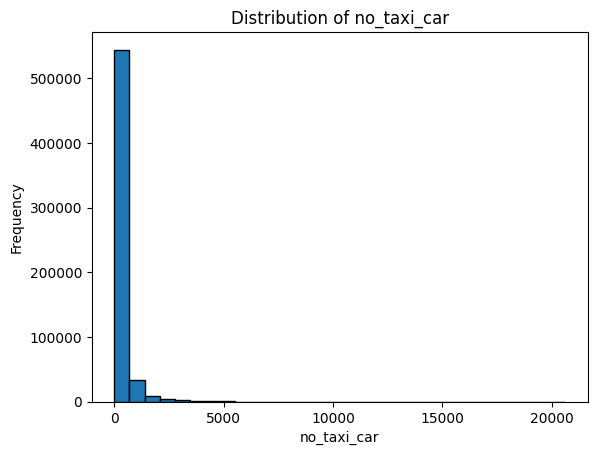

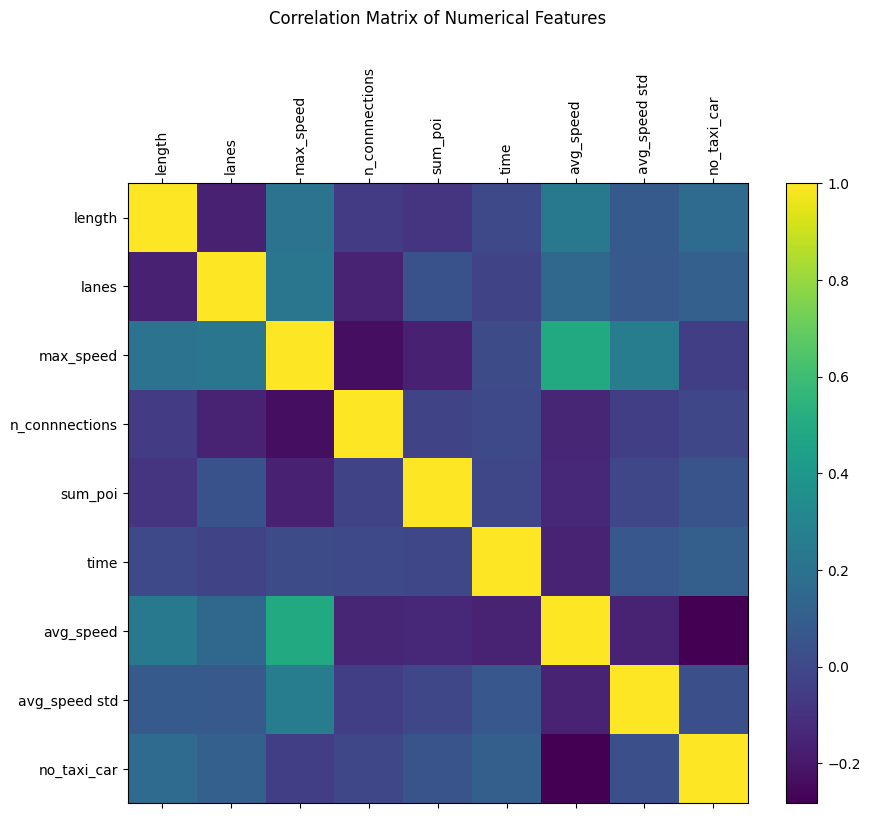

                  length     lanes  max_speed  n_connnections   sum_poi  \
length          1.000000 -0.164881   0.207187       -0.057290 -0.087033   
lanes          -0.164881  1.000000   0.219272       -0.158214  0.039605   
max_speed       0.207187  0.219272   1.000000       -0.232577 -0.165249   
n_connnections -0.057290 -0.158214  -0.232577        1.000000 -0.018531   
sum_poi        -0.087033  0.039605  -0.165249       -0.018531  1.000000   
time            0.002693 -0.021568   0.010488        0.000209 -0.009436   
avg_speed       0.234577  0.148575   0.496694       -0.146982 -0.140076   
avg_speed std   0.081324  0.076574   0.257627       -0.046385 -0.008485   
no_taxi_car     0.166827  0.110396  -0.044617       -0.008676  0.049862   

                    time  avg_speed  avg_speed std  no_taxi_car  
length          0.002693   0.234577       0.081324     0.166827  
lanes          -0.021568   0.148575       0.076574     0.110396  
max_speed       0.010488   0.496694       0.257627 

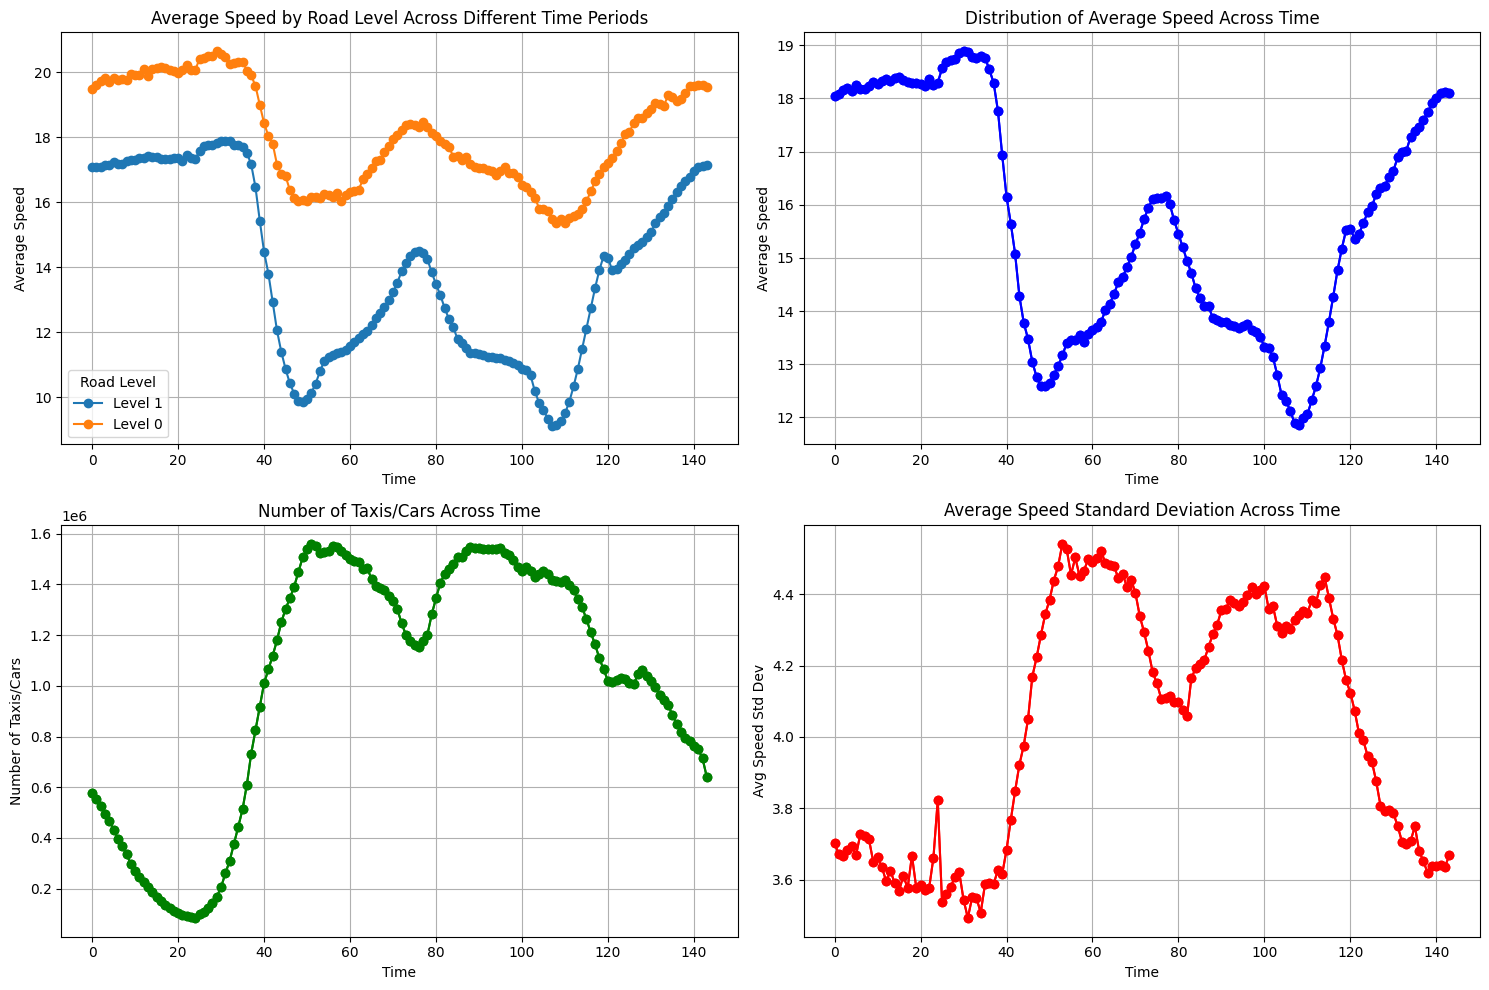

time
51    1561111
52    1552014
56    1550059
88    1548700
57    1547492
89    1545168
95    1543272
90    1542105
94    1540955
93    1539966
Name: no_taxi_car, dtype: int64


In [15]:
df = level1_road_history_workday
summary_stats(df)
plot_histograme(df)
show_correlation(df)
distribution_time(df)
peak_hour_usage(df)

statistics summery:
             road_id        length         lanes     max_speed           dir  \
count  3.109079e+06  3.109079e+06  3.109079e+06  3.109079e+06  3.109079e+06   
mean   3.916377e+04  1.300389e+02  2.575893e+00  1.165384e+01  2.334807e-02   
std    2.382959e+04  1.293934e+02  1.023647e+00  2.218036e+00  1.510064e-01   
min    2.000000e+00  1.158906e+00  1.000000e+00  8.333333e+00  0.000000e+00   
25%    1.794300e+04  4.601434e+01  2.000000e+00  1.111111e+01  0.000000e+00   
50%    3.888800e+04  9.651705e+01  2.000000e+00  1.111111e+01  0.000000e+00   
75%    6.098800e+04  1.691863e+02  3.000000e+00  1.111111e+01  0.000000e+00   
max    8.159200e+04  2.092681e+03  7.000000e+00  1.944444e+01  1.000000e+00   

           level           tor  n_connnections        school           ofc  \
count  3109079.0  3.109079e+06    3.109079e+06  3.109079e+06  3.109079e+06   
mean         2.0  1.007431e+00    4.302894e+00  2.046014e-01  6.971598e-01   
std          0.0  8.836562e-02   

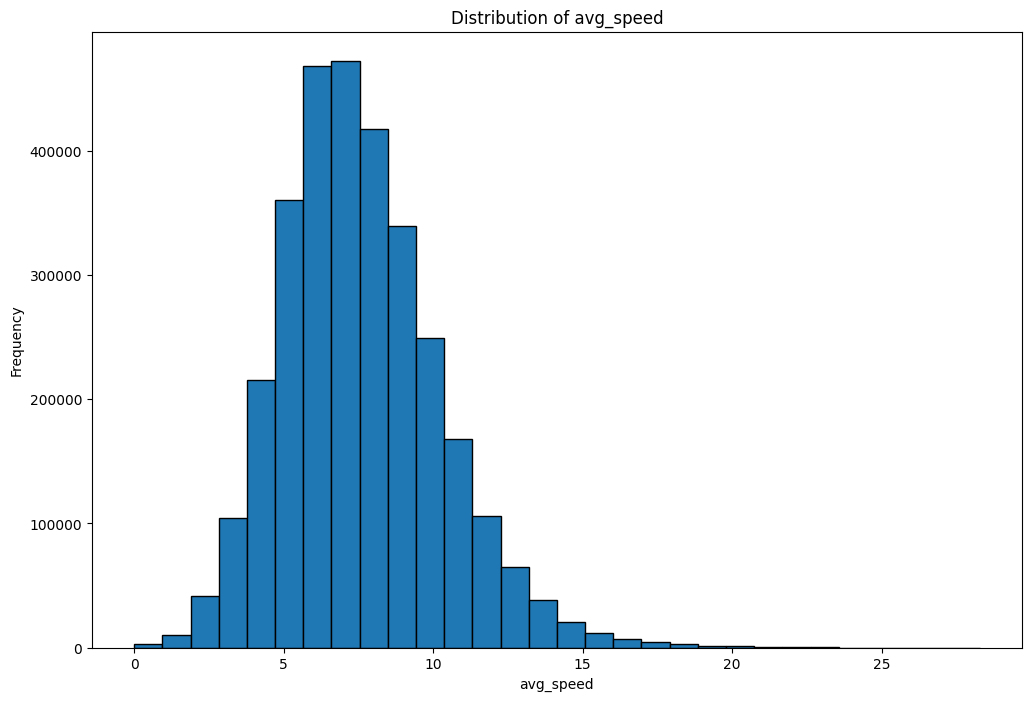

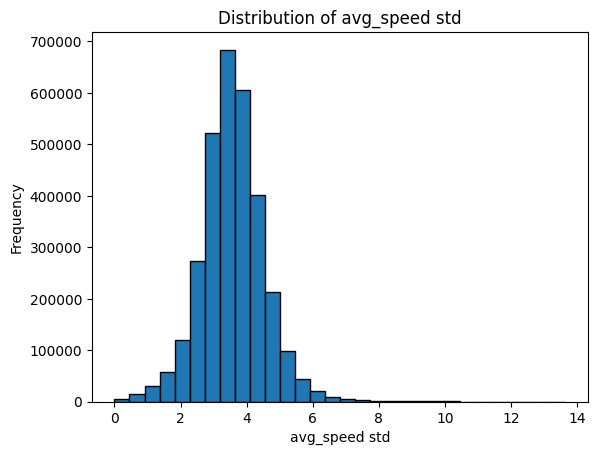

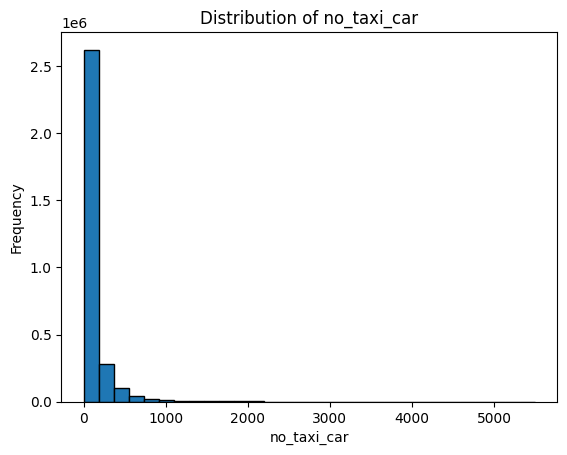

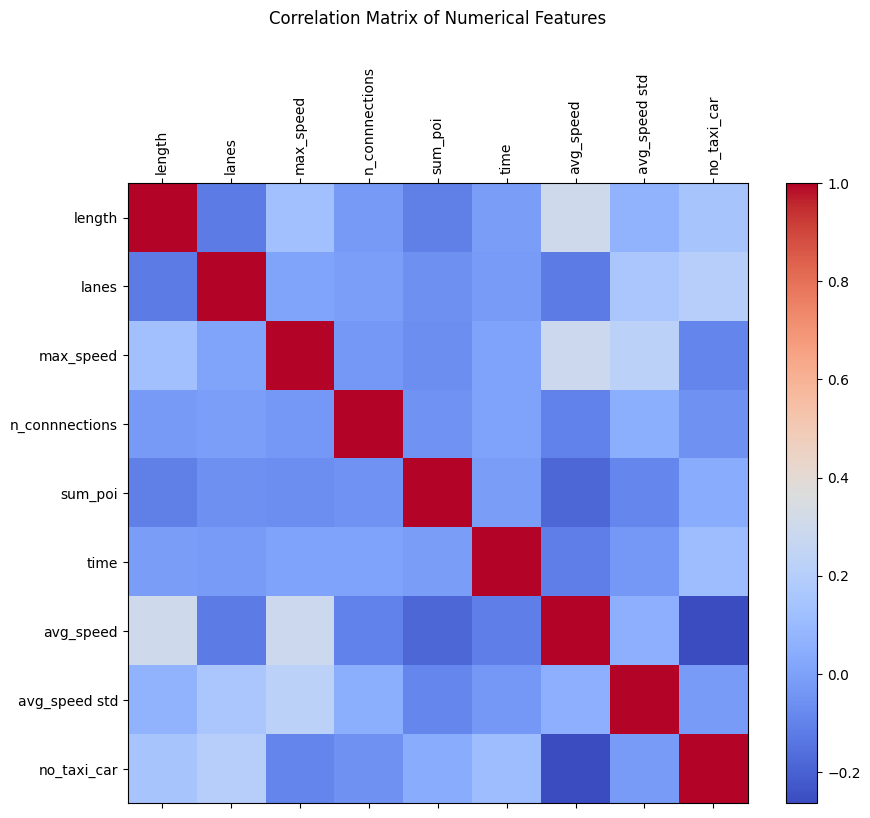

                  length     lanes  max_speed  n_connnections   sum_poi  \
length          1.000000 -0.124569   0.129875       -0.023511 -0.107902   
lanes          -0.124569  1.000000   0.009661       -0.009304 -0.057081   
max_speed       0.129875  0.009661   1.000000       -0.027496 -0.064765   
n_connnections -0.023511 -0.009304  -0.027496        1.000000 -0.048467   
sum_poi        -0.107902 -0.057081  -0.064765       -0.048467  1.000000   
time           -0.013139 -0.019292   0.005220        0.006687 -0.014878   
avg_speed       0.302412 -0.123278   0.289312       -0.103033 -0.182070   
avg_speed std   0.069150  0.156923   0.222591        0.050095 -0.086843   
no_taxi_car     0.146548  0.201361  -0.092023       -0.054184  0.039700   

                    time  avg_speed  avg_speed std  no_taxi_car  
length         -0.013139   0.302412       0.069150     0.146548  
lanes          -0.019292  -0.123278       0.156923     0.201361  
max_speed       0.005220   0.289312       0.222591 

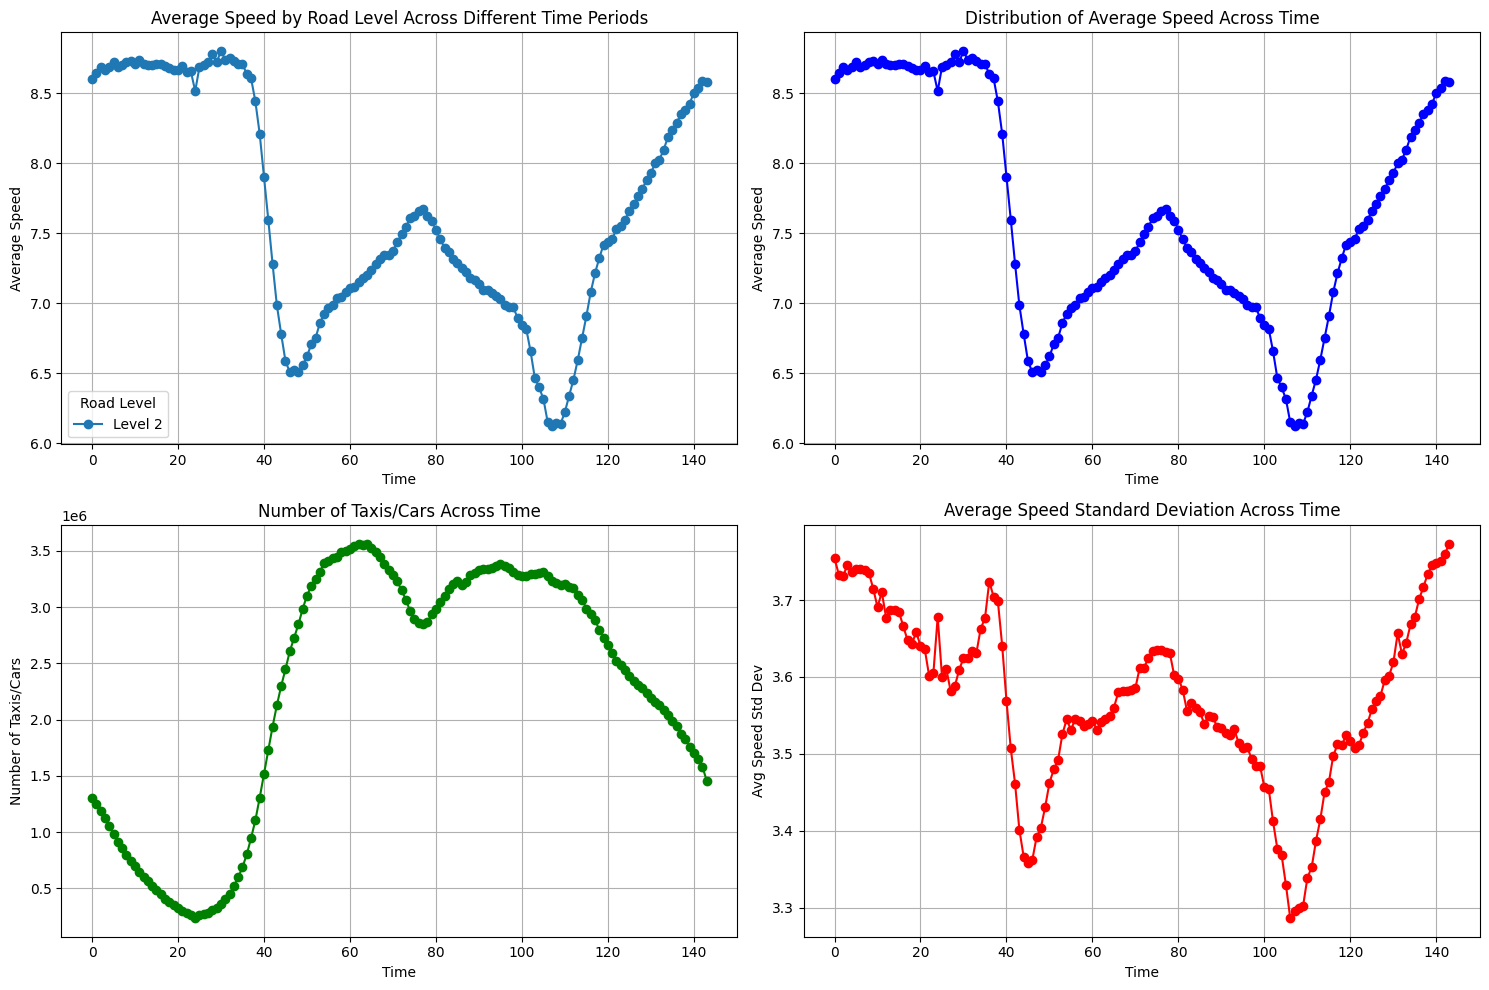

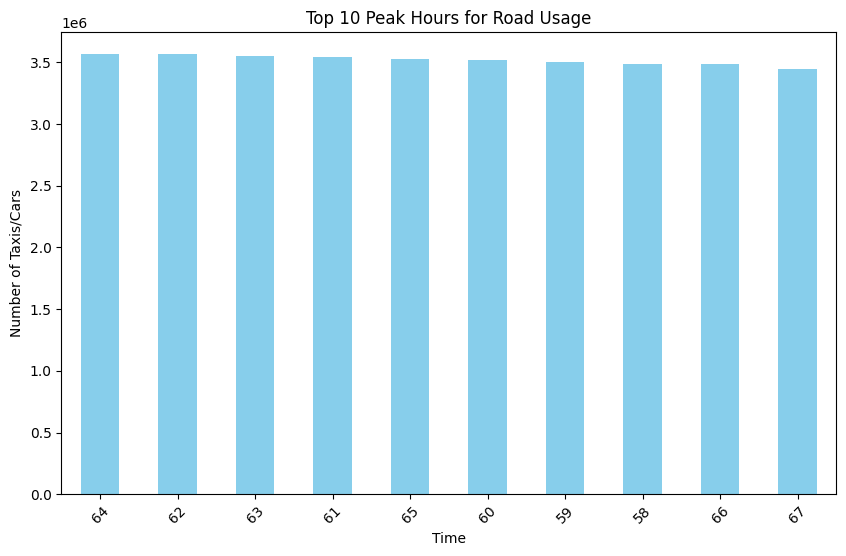

In [20]:
df = level2_road_history_workday
summary_stats(df)
plot_histograme(df)
show_correlation(df)
distribution_time(df)
peak_hour_usage(df)

statistics summery:
             road_id        length         lanes     max_speed           dir  \
count  4.854074e+06  4.854074e+06  4.854074e+06  4.854074e+06  4.854074e+06   
mean   3.946490e+04  1.354297e+02  1.516625e+00  6.160185e+00  6.561707e-01   
std    2.289983e+04  1.379819e+02  7.677985e-01  2.371186e+00  4.749850e-01   
min    0.000000e+00  1.288185e+00  1.000000e+00  5.555556e+00  0.000000e+00   
25%    2.042700e+04  5.008577e+01  1.000000e+00  5.555556e+00  0.000000e+00   
50%    3.861800e+04  1.008307e+02  1.000000e+00  5.555556e+00  1.000000e+00   
75%    5.678900e+04  1.739605e+02  2.000000e+00  5.555556e+00  1.000000e+00   
max    8.158800e+04  3.175280e+03  7.000000e+00  1.944444e+01  1.000000e+00   

              level           tor  n_connnections        school           ofc  \
count  4.854074e+06  4.854074e+06    4.854074e+06  4.854074e+06  4.854074e+06   
mean   3.355491e+00  1.024324e+00    4.265516e+00  4.329664e-01  1.944859e+00   
std    1.220248e+00  1.8

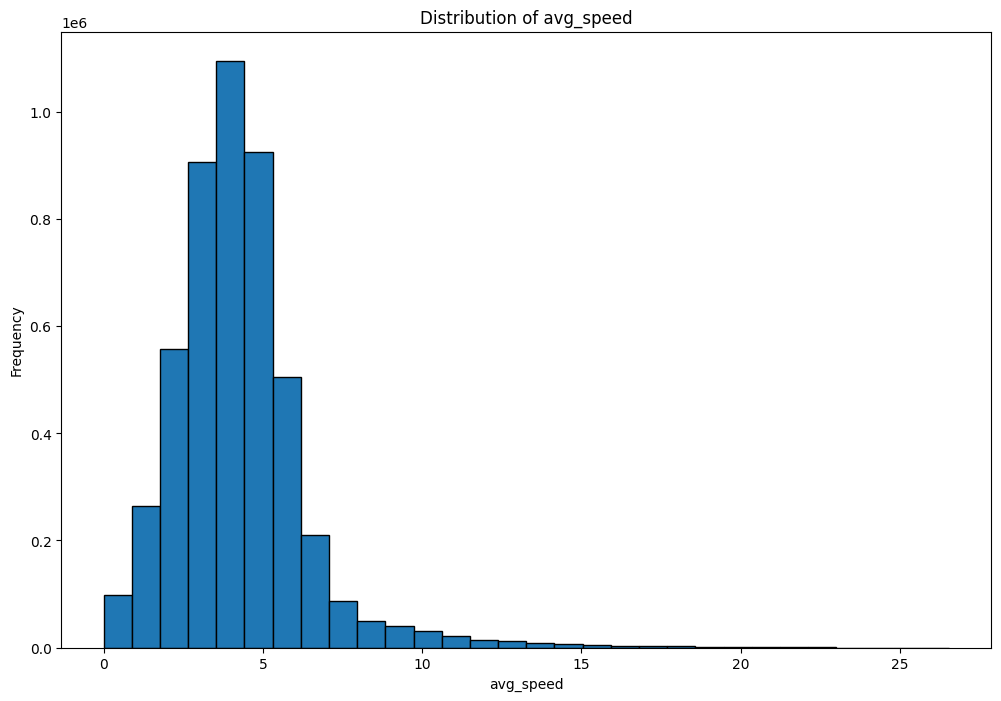

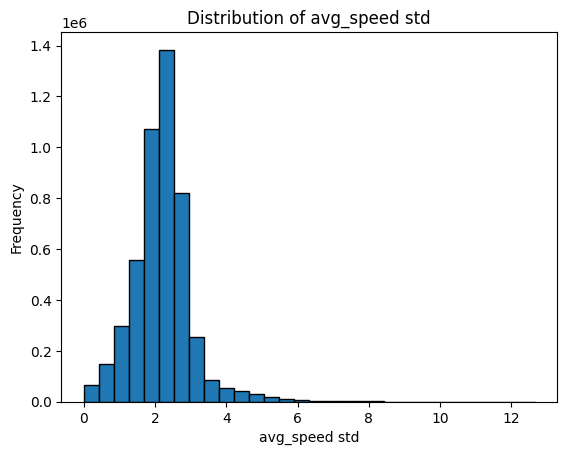

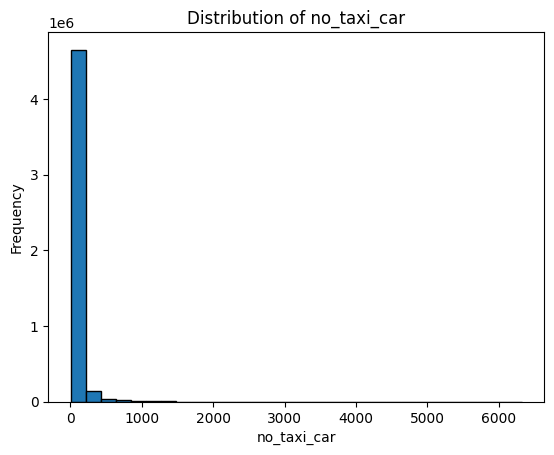

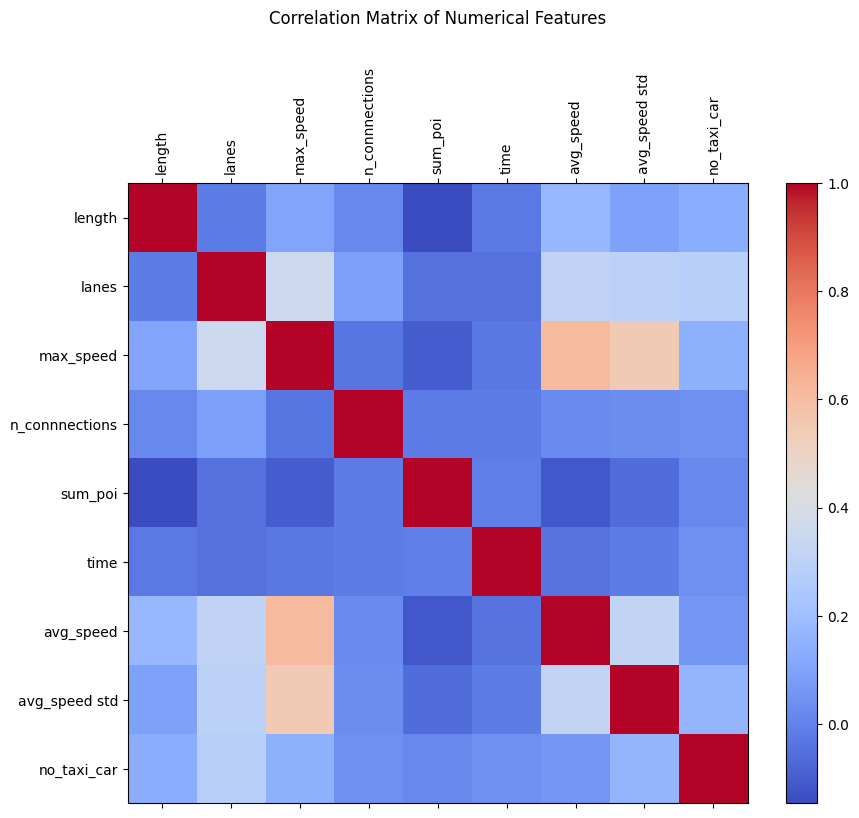

                  length     lanes  max_speed  n_connnections   sum_poi  \
length          1.000000 -0.013072   0.106311        0.016359 -0.146511   
lanes          -0.013072  1.000000   0.358762        0.088444 -0.046591   
max_speed       0.106311  0.358762   1.000000       -0.034169 -0.097489   
n_connnections  0.016359  0.088444  -0.034169        1.000000 -0.019405   
sum_poi        -0.146511 -0.046591  -0.097489       -0.019405  1.000000   
time           -0.022313 -0.045006  -0.029822       -0.013541 -0.008823   
avg_speed       0.175211  0.314640   0.606977        0.028131 -0.112365   
avg_speed std   0.092987  0.300671   0.540775        0.030640 -0.058551   
no_taxi_car     0.135316  0.281117   0.147387        0.037352  0.015025   

                    time  avg_speed  avg_speed std  no_taxi_car  
length         -0.022313   0.175211       0.092987     0.135316  
lanes          -0.045006   0.314640       0.300671     0.281117  
max_speed      -0.029822   0.606977       0.540775 

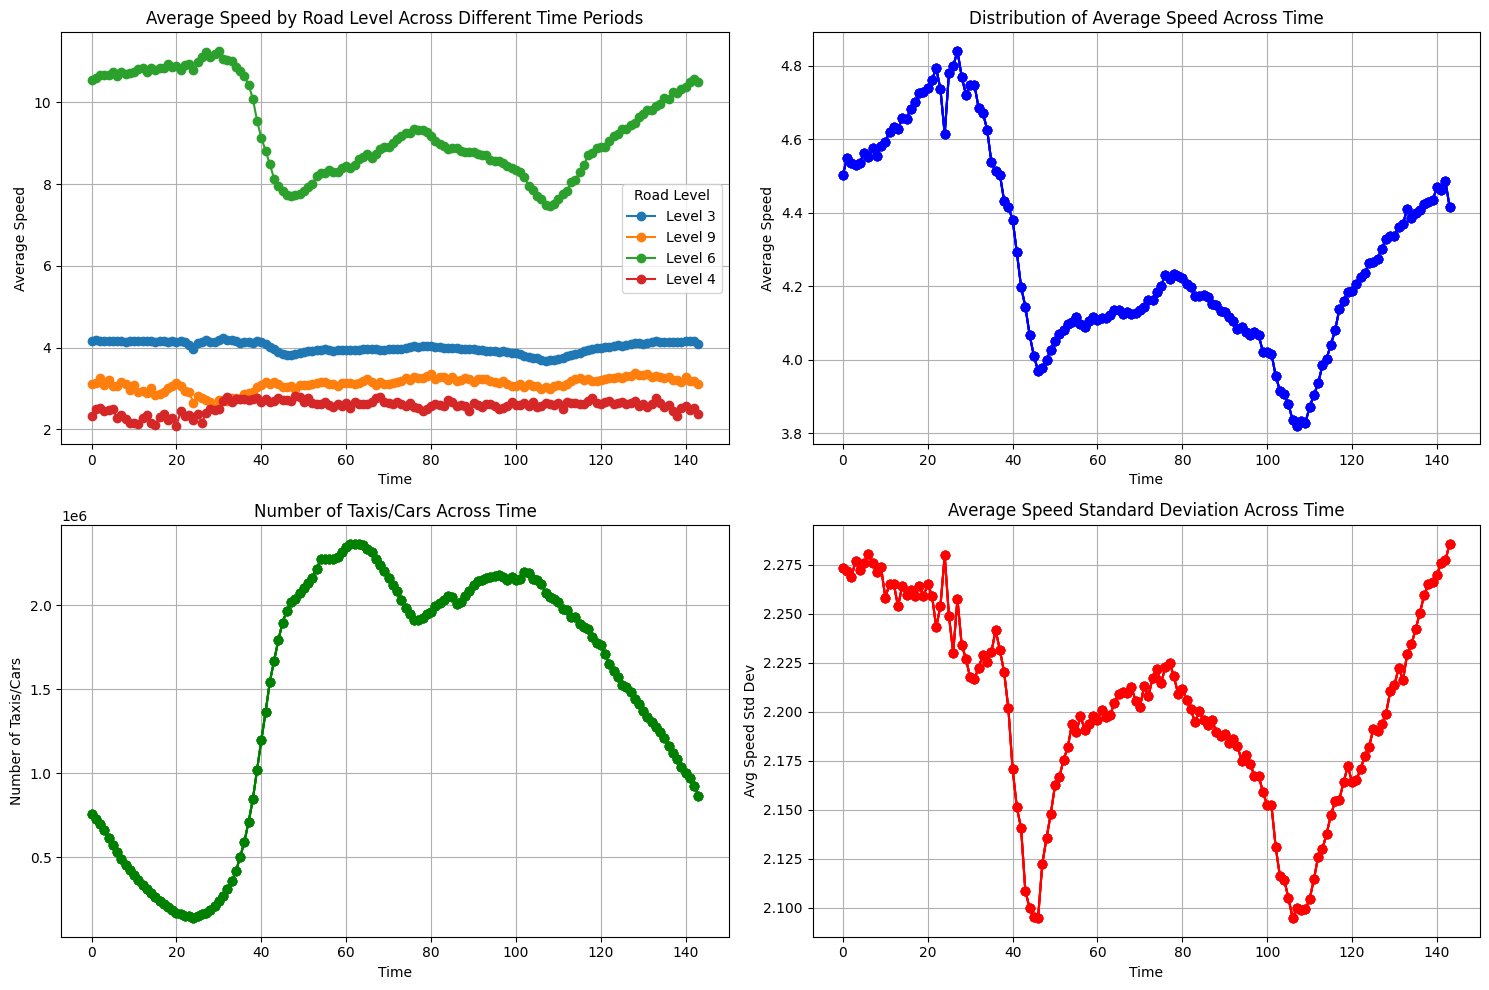

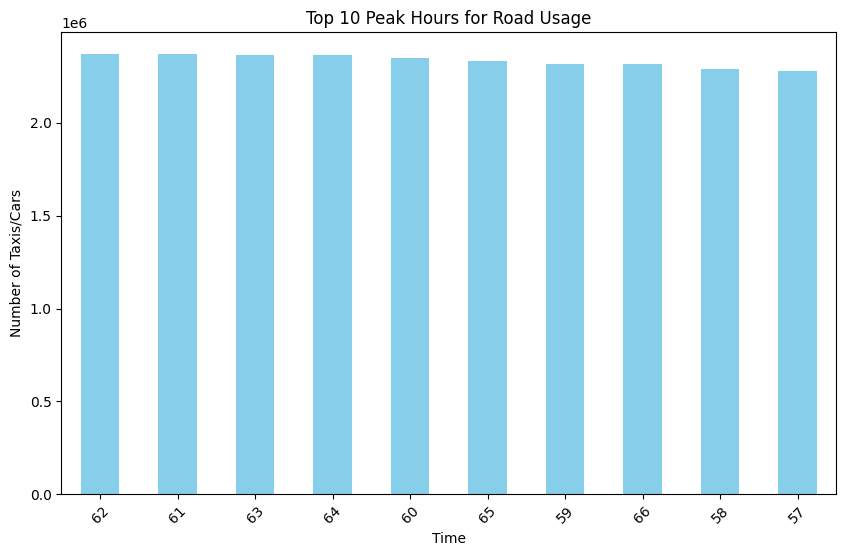

In [24]:
df = level3_road_history_workday
summary_stats(df)
plot_histograme(df)
show_correlation(df)
distribution_time(df)
peak_hour_usage(df)

## Holiday

statistics summery:
             road_id         length          lanes      max_speed  \
count  574619.00000  574619.000000  574619.000000  574619.000000   
mean    41473.64347     298.957818       3.036619      22.794819   
std     22787.52039     430.391099       0.825961       6.433854   
min       129.00000       5.737977       1.000000       2.777778   
25%     21975.00000      73.991030       3.000000      19.444444   
50%     39758.00000     165.617654       3.000000      19.444444   
75%     60047.00000     360.816479       4.000000      30.555556   
max     81557.00000    5554.701467       8.000000      30.555556   

                 dir          level            tor  n_connnections  \
count  574619.000000  574619.000000  574619.000000   574619.000000   
mean        0.000084       0.593139       1.036022        2.859070   
std         0.009139       0.491249       0.287286        1.028893   
min         0.000000       0.000000       1.000000        0.000000   
25%         0.00

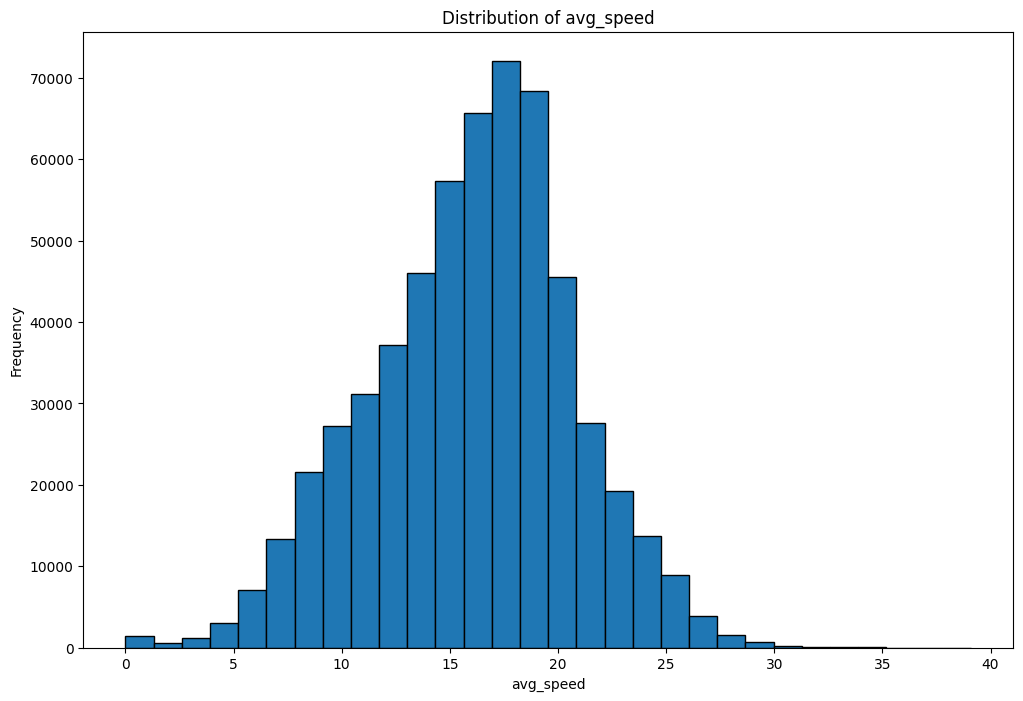

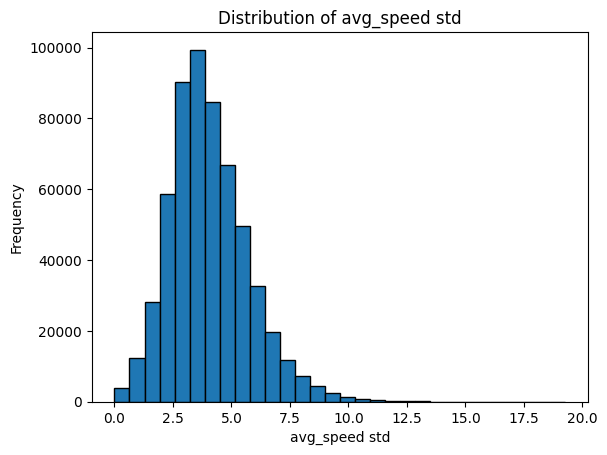

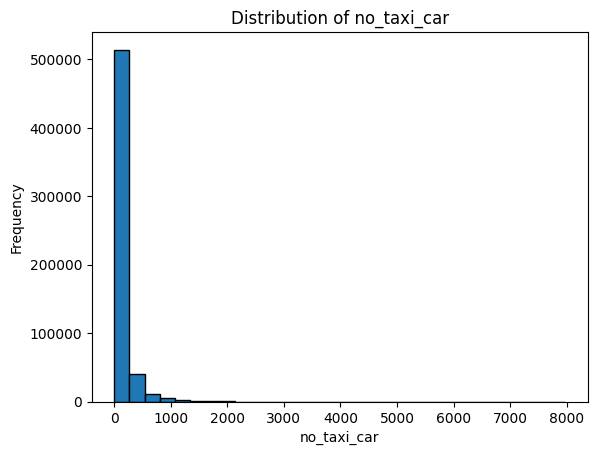

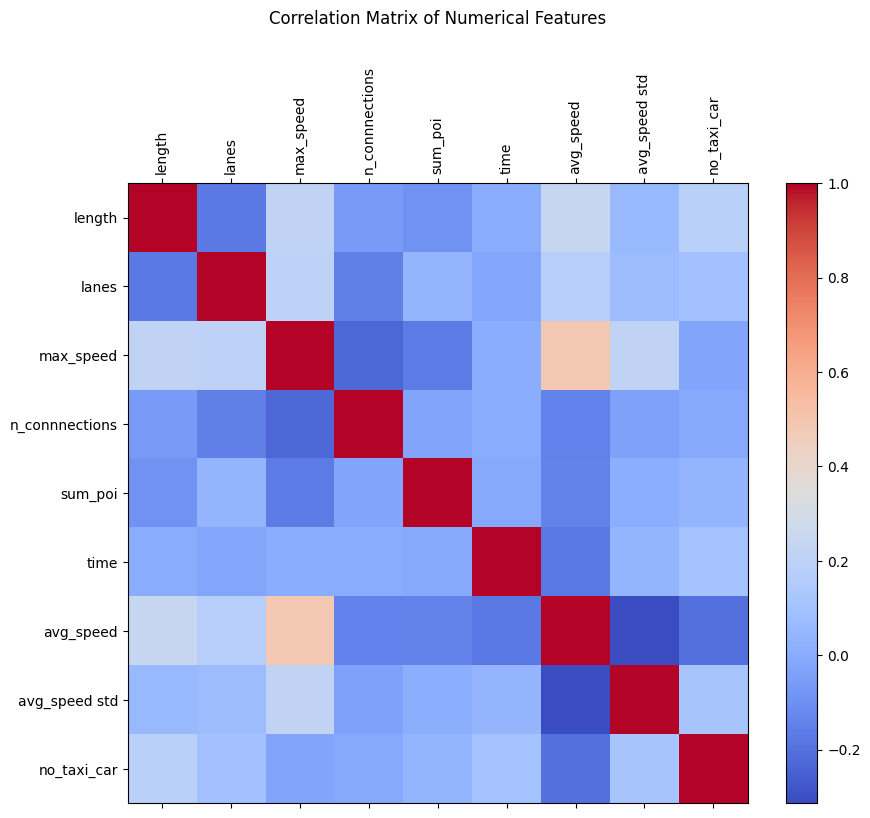

                  length     lanes  max_speed  n_connnections   sum_poi  \
length          1.000000 -0.170766   0.215072       -0.058340 -0.089180   
lanes          -0.170766  1.000000   0.200572       -0.153739  0.041089   
max_speed       0.215072  0.200572   1.000000       -0.226493 -0.164585   
n_connnections -0.058340 -0.153739  -0.226493        1.000000 -0.021202   
sum_poi        -0.089180  0.041089  -0.164585       -0.021202  1.000000   
time            0.000002 -0.020192   0.009317        0.000977 -0.010228   
avg_speed       0.238590  0.173753   0.486902       -0.148719 -0.139345   
avg_speed std   0.059884  0.076195   0.211632       -0.038680  0.013793   
no_taxi_car     0.185309  0.097710  -0.020936       -0.010146  0.043009   

                    time  avg_speed  avg_speed std  no_taxi_car  
length          0.000002   0.238590       0.059884     0.185309  
lanes          -0.020192   0.173753       0.076195     0.097710  
max_speed       0.009317   0.486902       0.211632 

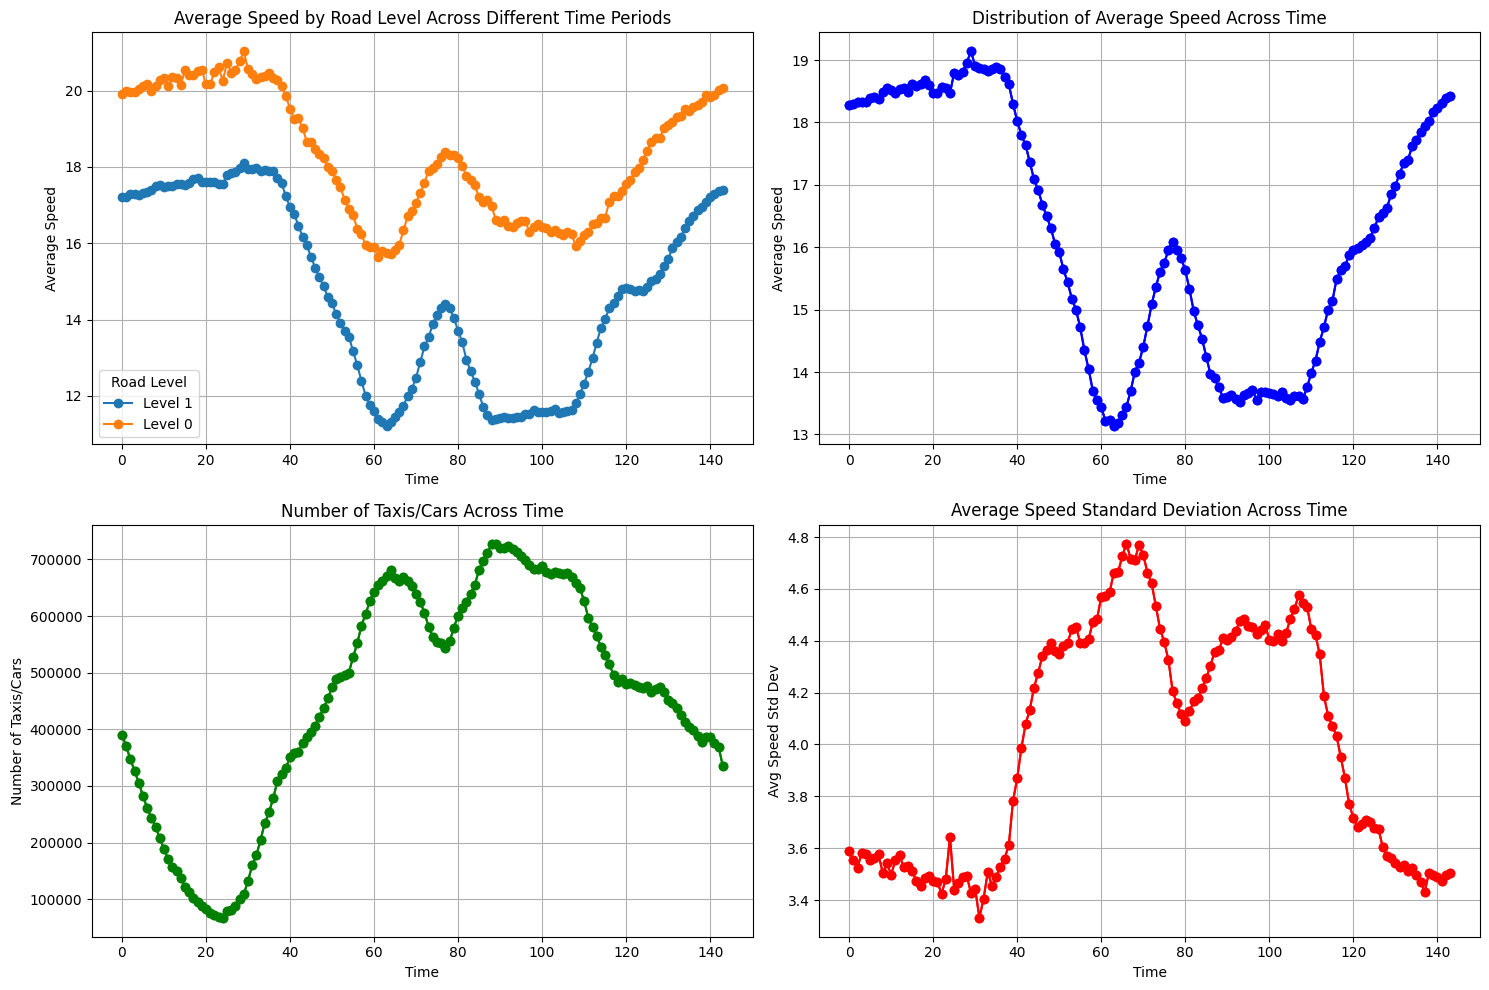

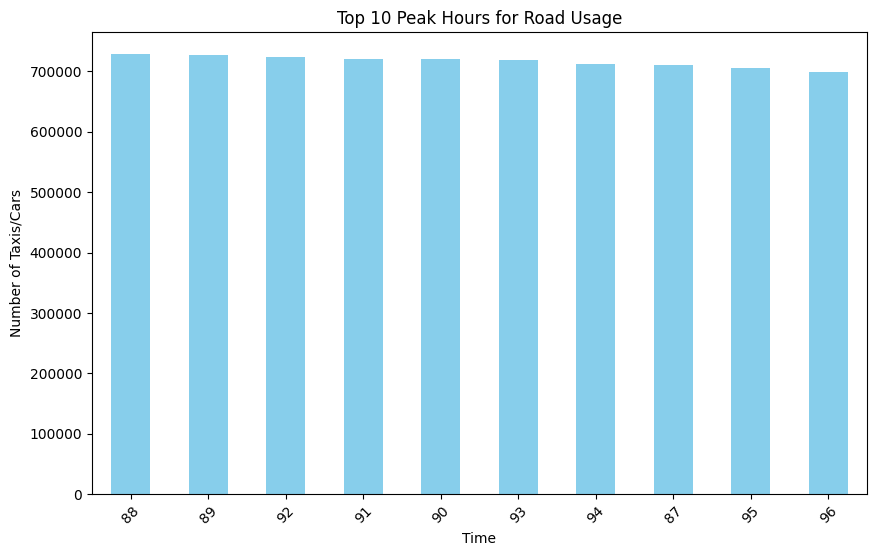

In [27]:
df = level1_road_history_holiday
summary_stats(df)
plot_histograme(df)
show_correlation(df)
distribution_time(df)
peak_hour_usage(df)
combined_stats(level1_road_history_workday,level1_road_history_holiday)

statistics summery:
             road_id        length         lanes     max_speed           dir  \
count  2.826584e+06  2.826584e+06  2.826584e+06  2.826584e+06  2.826584e+06   
mean   3.825963e+04  1.322725e+02  2.598791e+00  1.162308e+01  2.158011e-02   
std    2.362370e+04  1.285615e+02  1.031188e+00  2.163262e+00  1.453080e-01   
min    2.000000e+00  1.158906e+00  1.000000e+00  8.333333e+00  0.000000e+00   
25%    1.747900e+04  4.950982e+01  2.000000e+00  1.111111e+01  0.000000e+00   
50%    3.670600e+04  9.962320e+01  2.000000e+00  1.111111e+01  0.000000e+00   
75%    5.925400e+04  1.714672e+02  3.000000e+00  1.111111e+01  0.000000e+00   
max    8.159200e+04  2.092681e+03  7.000000e+00  1.944444e+01  1.000000e+00   

           level           tor  n_connnections        school           ofc  \
count  2826584.0  2.826584e+06    2.826584e+06  2.826584e+06  2.826584e+06   
mean         2.0  1.007438e+00    4.285793e+00  2.114128e-01  7.122371e-01   
std          0.0  8.911740e-02   

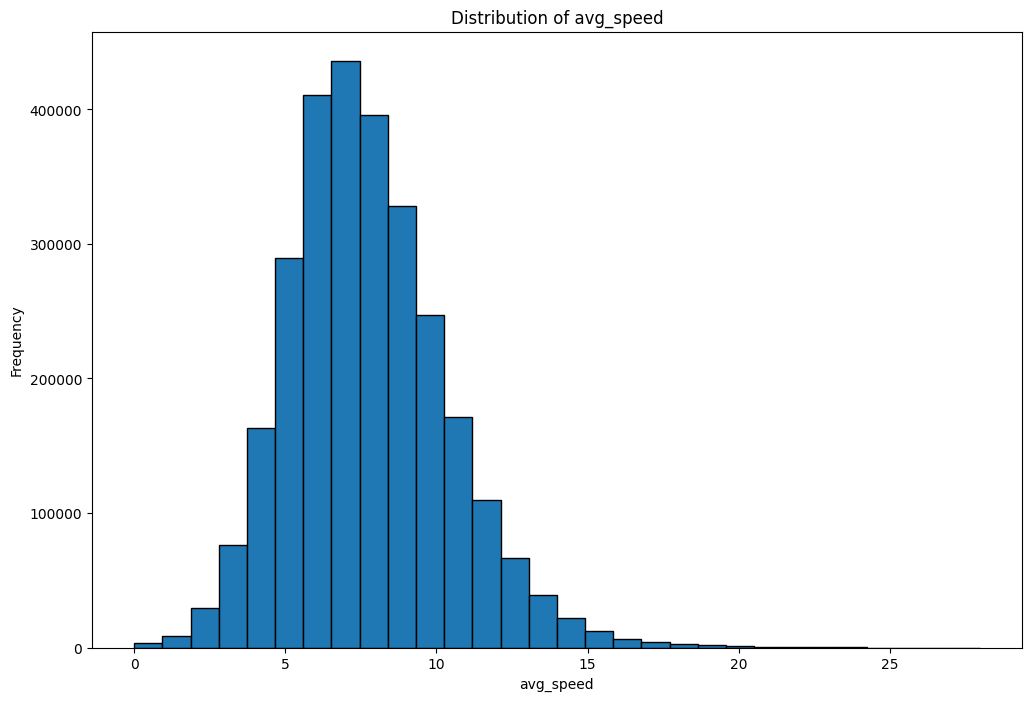

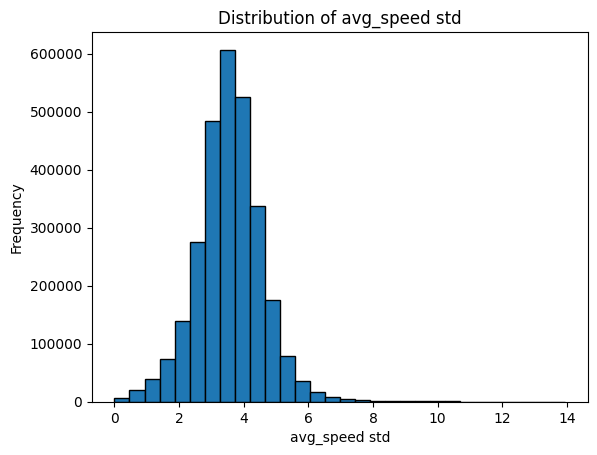

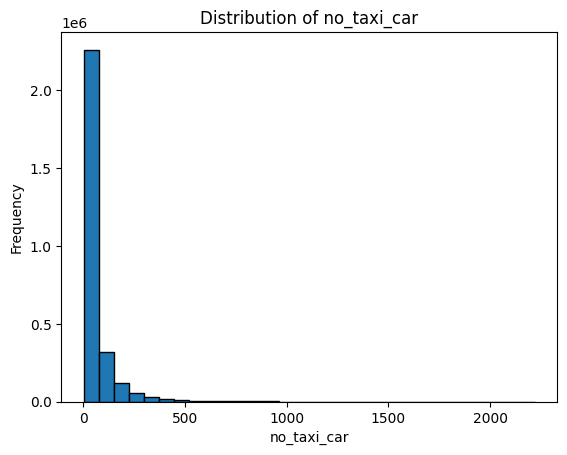

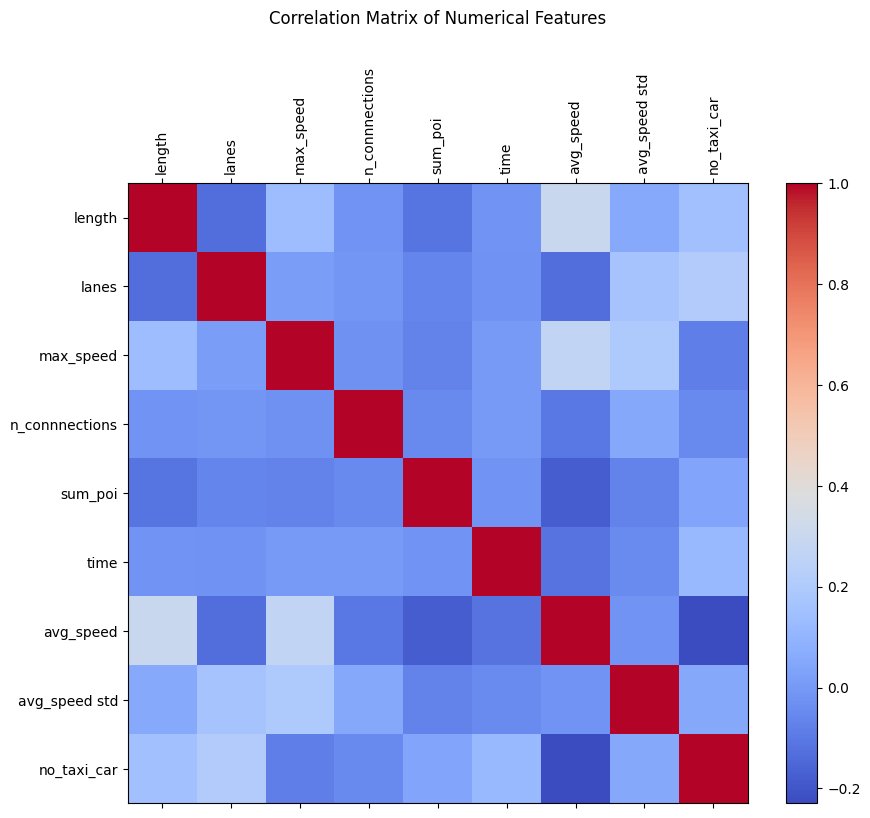

                  length     lanes  max_speed  n_connnections   sum_poi  \
length          1.000000 -0.132065   0.137916       -0.015978 -0.110303   
lanes          -0.132065  1.000000   0.012340       -0.013020 -0.062739   
max_speed       0.137916  0.012340   1.000000       -0.026384 -0.066279   
n_connnections -0.015978 -0.013020  -0.026384        1.000000 -0.049151   
sum_poi        -0.110303 -0.062739  -0.066279       -0.049151  1.000000   
time           -0.015990 -0.020530   0.003632        0.005811 -0.013743   
avg_speed       0.301337 -0.132879   0.270914       -0.100565 -0.178054   
avg_speed std   0.055181  0.168016   0.194128        0.051367 -0.068638   
no_taxi_car     0.152154  0.211903  -0.085081       -0.051103  0.040966   

                    time  avg_speed  avg_speed std  no_taxi_car  
length         -0.015990   0.301337       0.055181     0.152154  
lanes          -0.020530  -0.132879       0.168016     0.211903  
max_speed       0.003632   0.270914       0.194128 

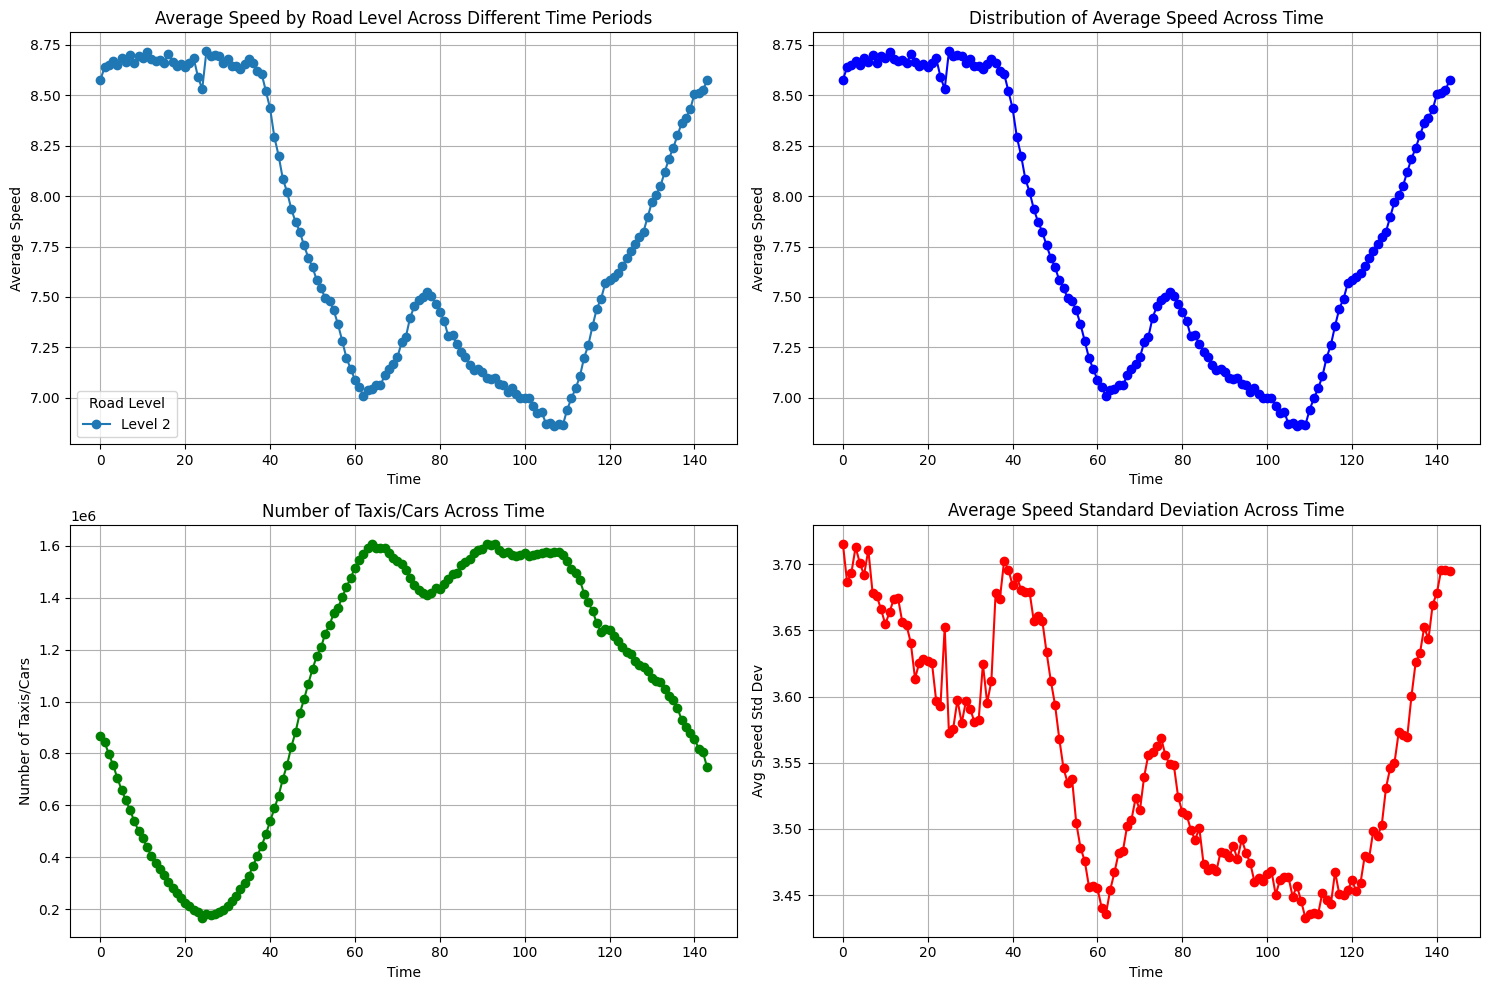

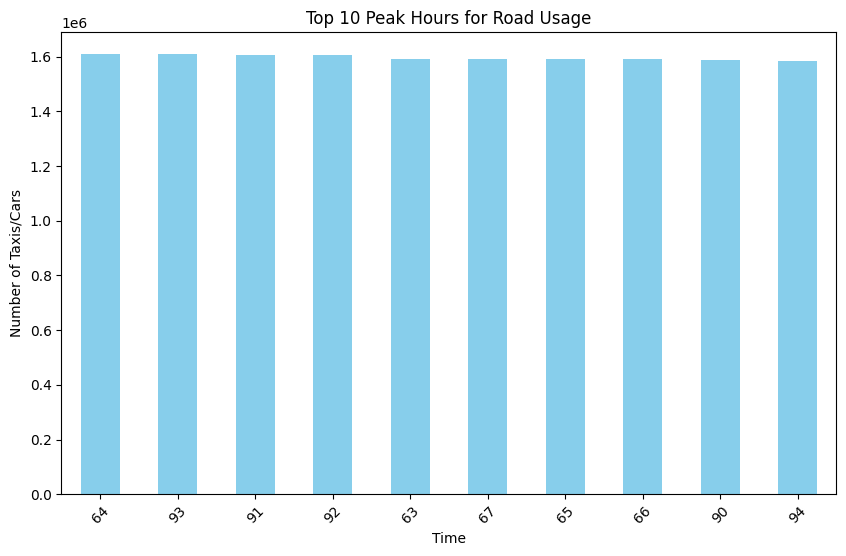

       Workday_speed  Holiday_speed  Workday_taxi  Holiday_taxi
count   3.109079e+06   2.826584e+06  3.109079e+06  2.826584e+06
mean    7.564182e+00   7.712903e+00  1.047357e+02  5.403791e+01
std     2.624436e+00   2.605883e+00  1.863033e+02  8.765518e+01
min     0.000000e+00   0.000000e+00  3.000000e+00  3.000000e+00
25%     5.748147e+00   5.924579e+00  1.300000e+01  9.000000e+00
50%     7.291702e+00   7.450371e+00  3.800000e+01  2.300000e+01
75%     9.119385e+00   9.257975e+00  1.130000e+02  6.100000e+01
max     2.828165e+01   2.796621e+01  5.494000e+03  2.219000e+03


In [46]:
df = level2_road_history_holiday
summary_stats(df)
plot_histograme(df)
show_correlation(df)
distribution_time(df)
peak_hour_usage(df)
combined_stats(level2_road_history_workday,level2_road_history_holiday)

statistics summery:
             road_id        length         lanes     max_speed           dir  \
count  3.789165e+06  3.789165e+06  3.789165e+06  3.789165e+06  3.789165e+06   
mean   3.913722e+04  1.404122e+02  1.575091e+00  6.262791e+00  6.432707e-01   
std    2.267904e+04  1.395215e+02  8.022727e-01  2.560569e+00  4.790340e-01   
min    0.000000e+00  1.288185e+00  1.000000e+00  5.555556e+00  0.000000e+00   
25%    2.047300e+04  5.474947e+01  1.000000e+00  5.555556e+00  0.000000e+00   
50%    3.843700e+04  1.056459e+02  1.000000e+00  5.555556e+00  1.000000e+00   
75%    5.568900e+04  1.801921e+02  2.000000e+00  5.555556e+00  1.000000e+00   
max    8.158800e+04  3.175280e+03  7.000000e+00  1.944444e+01  1.000000e+00   

              level           tor  n_connnections        school           ofc  \
count  3.789165e+06  3.789165e+06    3.789165e+06  3.789165e+06  3.789165e+06   
mean   3.353439e+00  1.022444e+00    4.306053e+00  4.206507e-01  1.769128e+00   
std    1.177391e+00  1.7

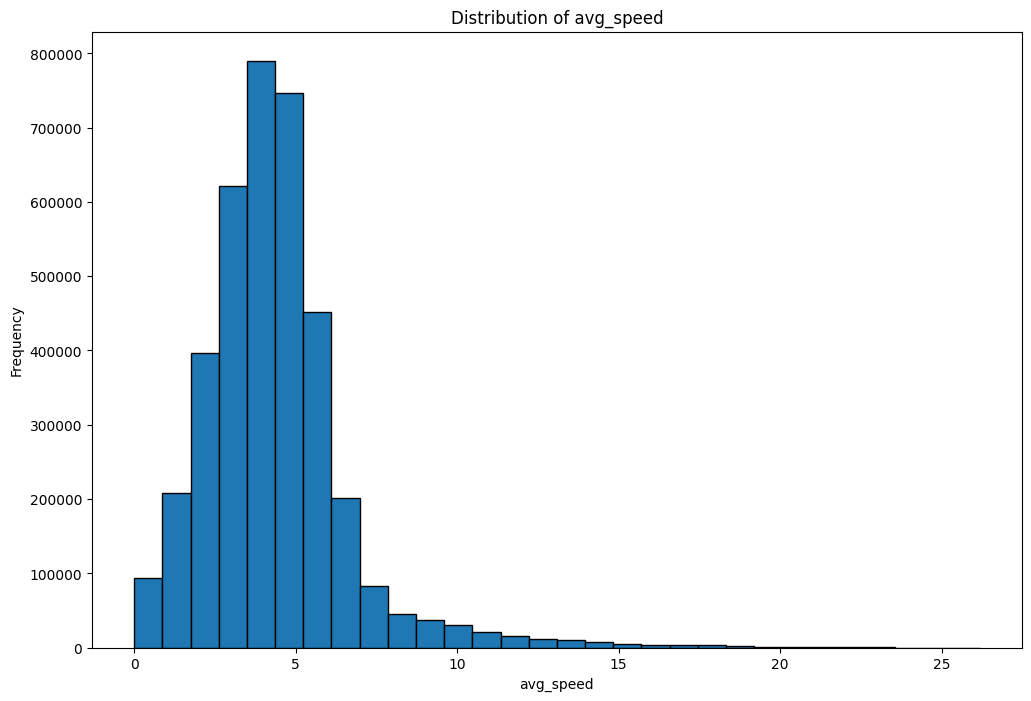

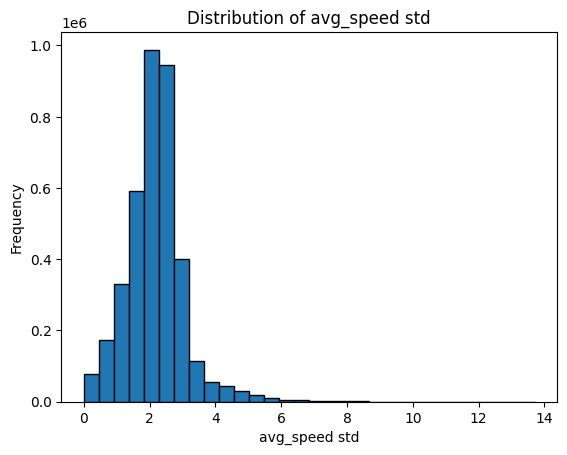

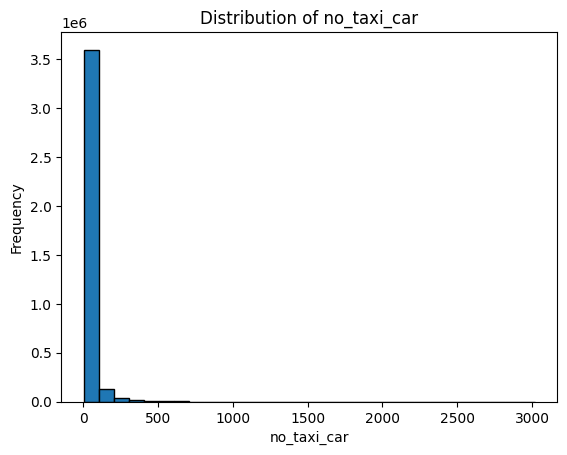

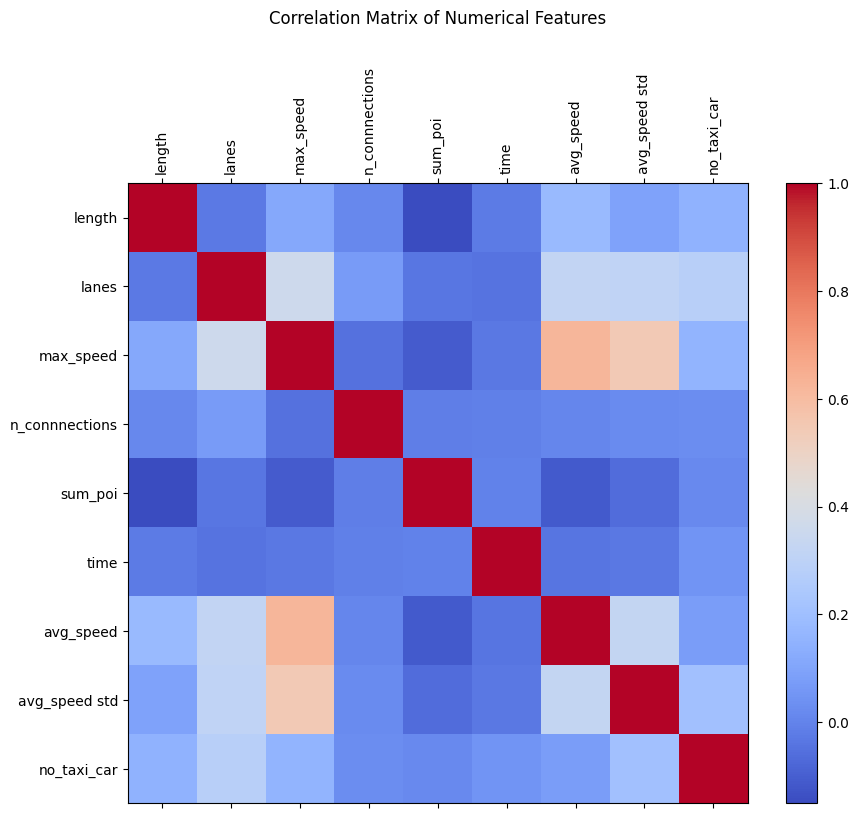

                  length     lanes  max_speed  n_connnections   sum_poi  \
length          1.000000 -0.025907   0.114058        0.012783 -0.150078   
lanes          -0.025907  1.000000   0.358946        0.073318 -0.037607   
max_speed       0.114058  0.358946   1.000000       -0.048346 -0.109462   
n_connnections  0.012783  0.073318  -0.048346        1.000000 -0.011108   
sum_poi        -0.150078 -0.037607  -0.109462       -0.011108  1.000000   
time           -0.022144 -0.045116  -0.031531       -0.010484 -0.005729   
avg_speed       0.180033  0.320590   0.619873        0.010125 -0.109965   
avg_speed std   0.094901  0.308358   0.544626        0.021809 -0.062185   
no_taxi_car     0.149214  0.282488   0.156709        0.028453  0.019417   

                    time  avg_speed  avg_speed std  no_taxi_car  
length         -0.022144   0.180033       0.094901     0.149214  
lanes          -0.045116   0.320590       0.308358     0.282488  
max_speed      -0.031531   0.619873       0.544626 

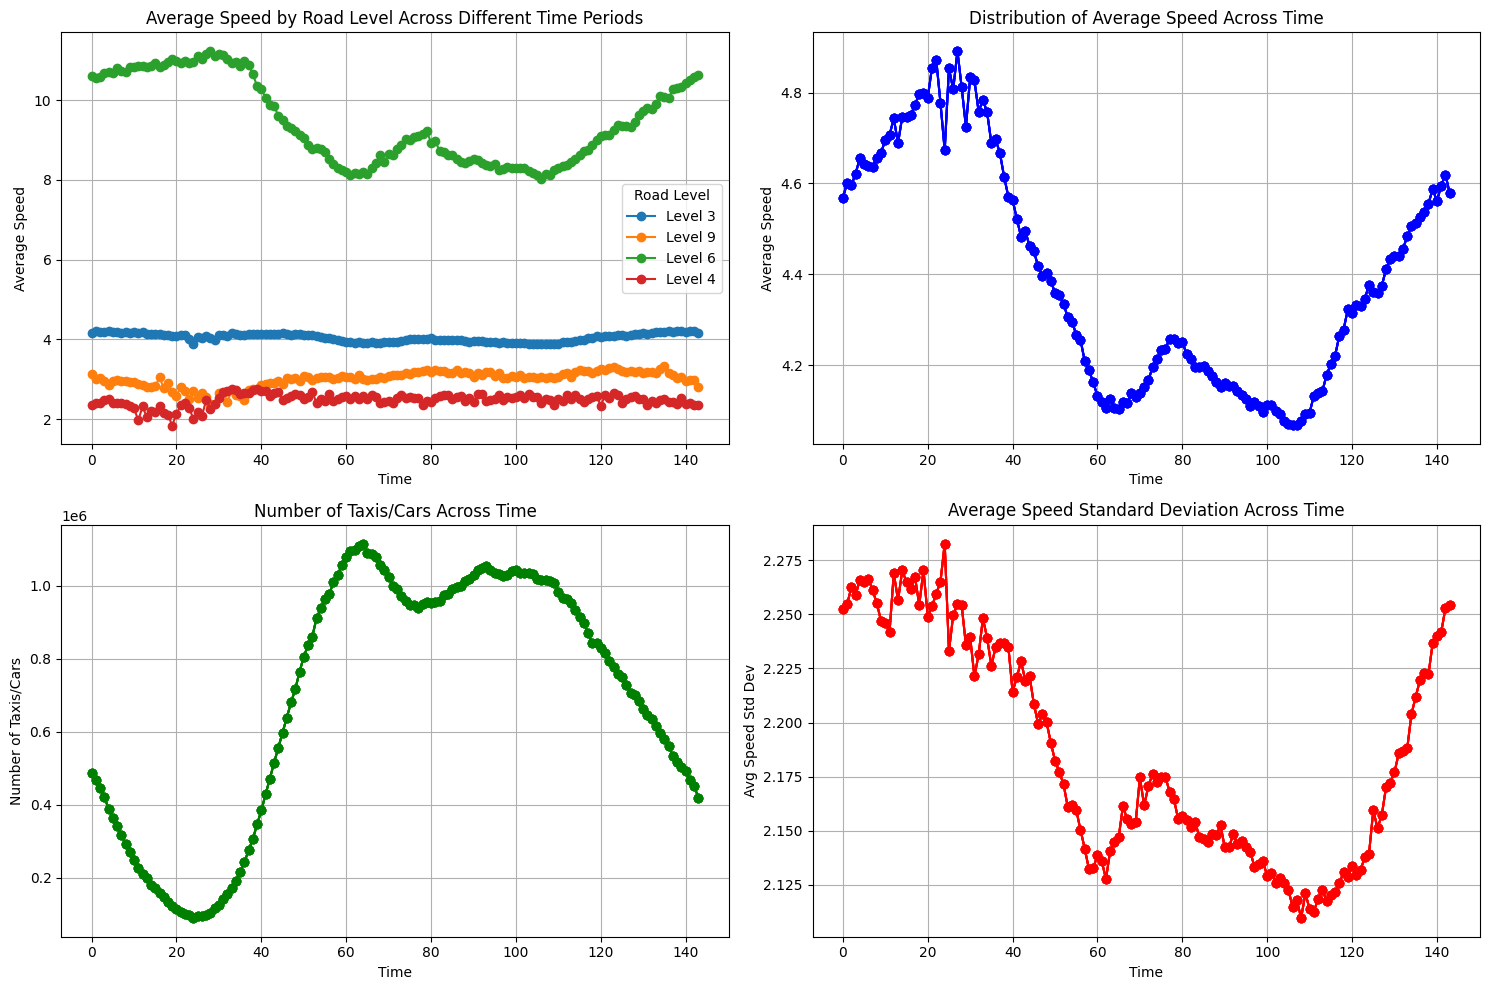

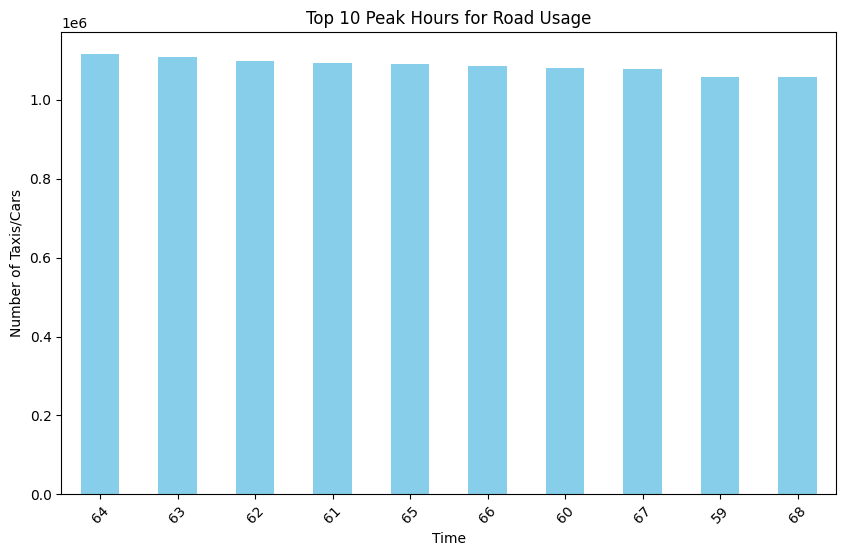

       Workday_speed  Holiday_speed  Workday_taxi  Holiday_taxi
count   4.854074e+06   3.789165e+06  4.854074e+06  3.789165e+06
mean    4.218828e+00   4.324510e+00  4.379502e+01  2.622393e+01
std     2.088288e+00   2.221157e+00  1.073612e+02  5.462653e+01
min     0.000000e+00   0.000000e+00  3.000000e+00  3.000000e+00
25%     2.975599e+00   3.003786e+00  6.000000e+00  5.000000e+00
50%     4.028215e+00   4.133831e+00  1.300000e+01  9.000000e+00
75%     5.076272e+00   5.216085e+00  3.500000e+01  2.300000e+01
max     2.654081e+01   2.617710e+01  6.320000e+03  3.018000e+03


In [47]:
df = level3_road_history_holiday
summary_stats(df)
plot_histograme(df)
show_correlation(df)
distribution_time(df)
peak_hour_usage(df)
combined_stats(level3_road_history_workday,level3_road_history_holiday)